# NSW vs OSW confluence

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import sys

# Move two levels up (to the project root) and append the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Append src to sys.path
sys.path.append(src_path)

from src import query_engines, dataframe_visualizer

q = query_engines.QueryEngines()

# Replicate user classification evolution

In [10]:
START_DATE = "'2023-08-01'"
END_DATE = "'2024-08-01'"
DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE = 60 # how many days between the start date of the experiment and the first exposure table

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'days_between_start_date_and_first_exposure', 'value': str(DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE)},
]

q.prepare_query(
    'nsw_osw_confluence/customer_classification_evolution.sql'
    ,params=params
    ,to_load_file='customer_classifcation_evolution'
    ,load_from_to_load_file=None
    
)

df  = q.query_run_starburst()

Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/892e0a705634d2f2671668f470de49aa8f943097e9472dab12ea64a5e65385a4


In [11]:
START_DATE = "'2023-08-01'"
END_DATE = "'2024-08-01'"

df['start_date'] = pd.to_datetime(df['start_date'])

cond1 = df['start_date'] >= pd.to_datetime(START_DATE)
cond2 = df['start_date'] <= pd.to_datetime(END_DATE)

df_pivoted = df[cond1 & cond2].pivot(index='start_date', columns='variant', values=['n_distinct_customers'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

In [12]:
df_pivoted['total'] = df_pivoted['n_distinct_customers__Control Group'] + df_pivoted['n_distinct_customers__Variant 1'] + df_pivoted['n_distinct_customers__forced_assignment']
df_pivoted['perc_control'] = df_pivoted['n_distinct_customers__Control Group']/df_pivoted['total']
df_pivoted['perc_variant'] = df_pivoted['n_distinct_customers__Variant 1']/df_pivoted['total']
df_pivoted['perc_forced'] = df_pivoted['n_distinct_customers__forced_assignment']/df_pivoted['total']

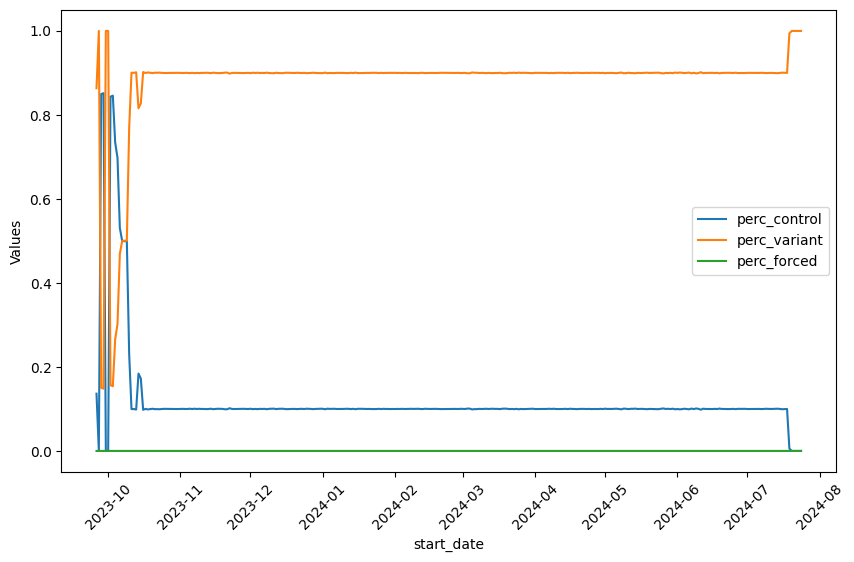

In [13]:
v = dataframe_visualizer.DataFrameVisualizer(df_pivoted)
v.multiple_variable_lineplot(
    'start_date',
    ['perc_control','perc_variant','perc_forced']
)

# Comparison Category Opened vs Store Wall even

In [15]:
START_DATE = "'2024-02-01'"
END_DATE = "'2024-08-01'"
DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE = 30

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'days_between_start_date_and_first_exposure', 'value': str(DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE)}
]

q.prepare_query(
    'nsw_osw_confluence/co_sw_comparison.sql'
    ,params=params
    ,to_load_file='co_sw_comparison'
    ,load_from_to_load_file=None
    
)

df  = q.query_run_starburst()

Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/6e73ee8d5e0468d972c0baa0b2d5b52ca9c7eaf720052c701325cee7e7ccff9b


In [16]:
tmp = df.copy()

In [17]:
df['variant'].unique()

array(['Control Group', None, 'Variant 1', 'forced_assignment'],
      dtype=object)

In [18]:
df['category'].unique()

array(['Shops', 'Health', 'Groceries', 'Food'], dtype=object)

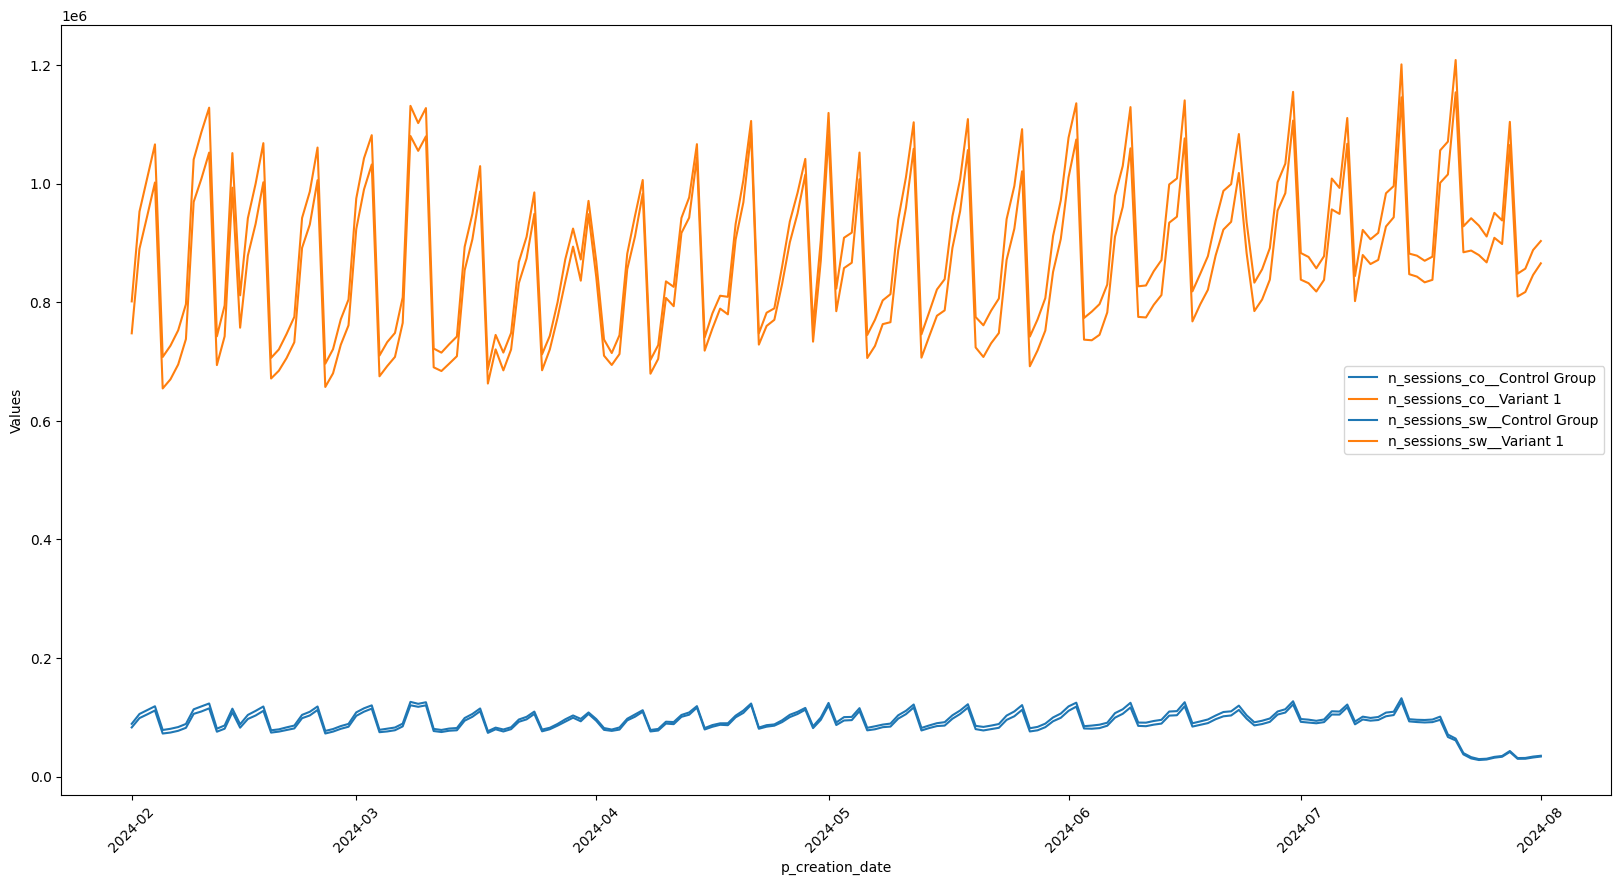

In [19]:
tmp = df.copy()

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Food'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['n_sessions_co__Control Group','n_sessions_co__Variant 1','n_sessions_sw__Control Group','n_sessions_sw__Variant 1']
    ,colors=['blue','orange','blue','orange']
)

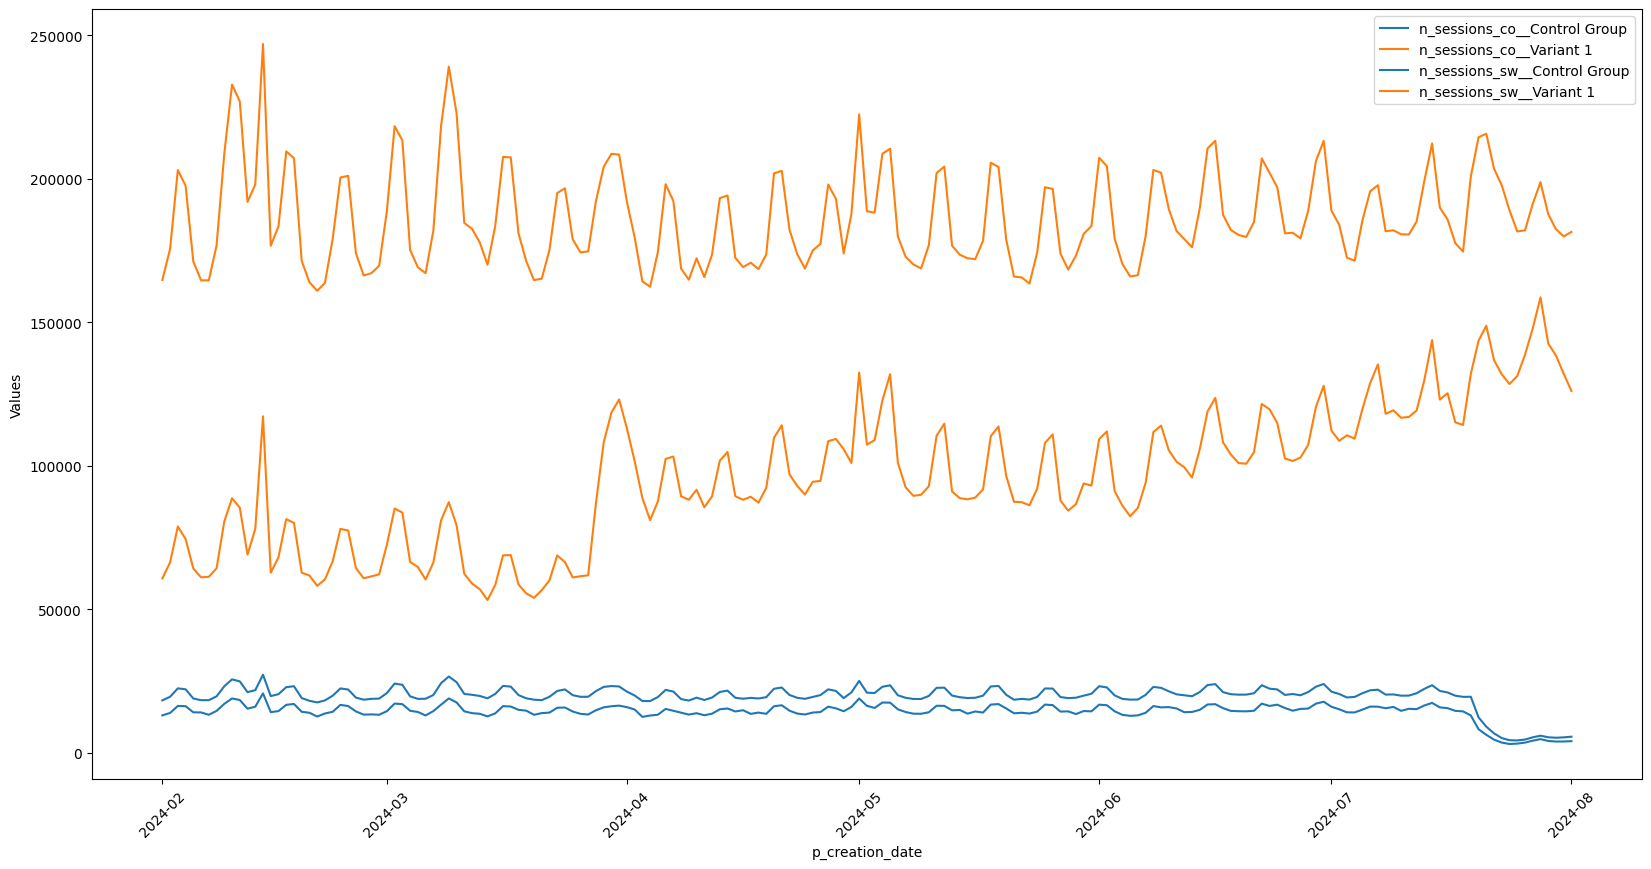

In [20]:
tmp = df.copy()

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Groceries'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['n_sessions_co__Control Group','n_sessions_co__Variant 1','n_sessions_sw__Control Group','n_sessions_sw__Variant 1']
    ,colors=['blue','orange','blue','orange']
)

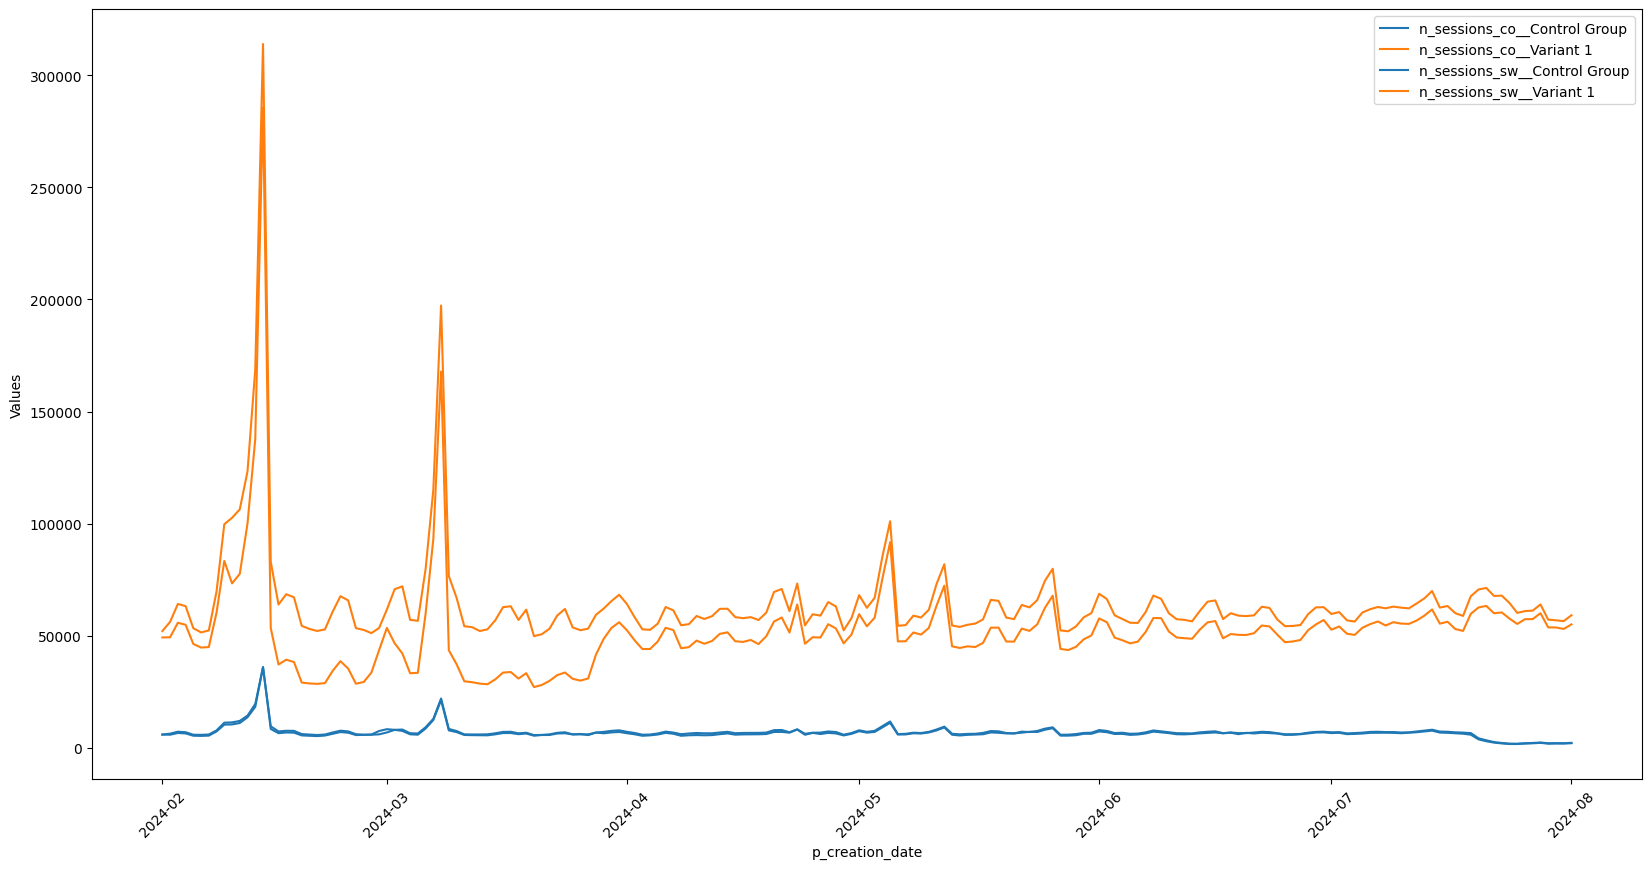

In [21]:
tmp = df.copy()

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Shops'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['n_sessions_co__Control Group','n_sessions_co__Variant 1','n_sessions_sw__Control Group','n_sessions_sw__Variant 1']
    ,colors=['blue','orange','blue','orange']
)

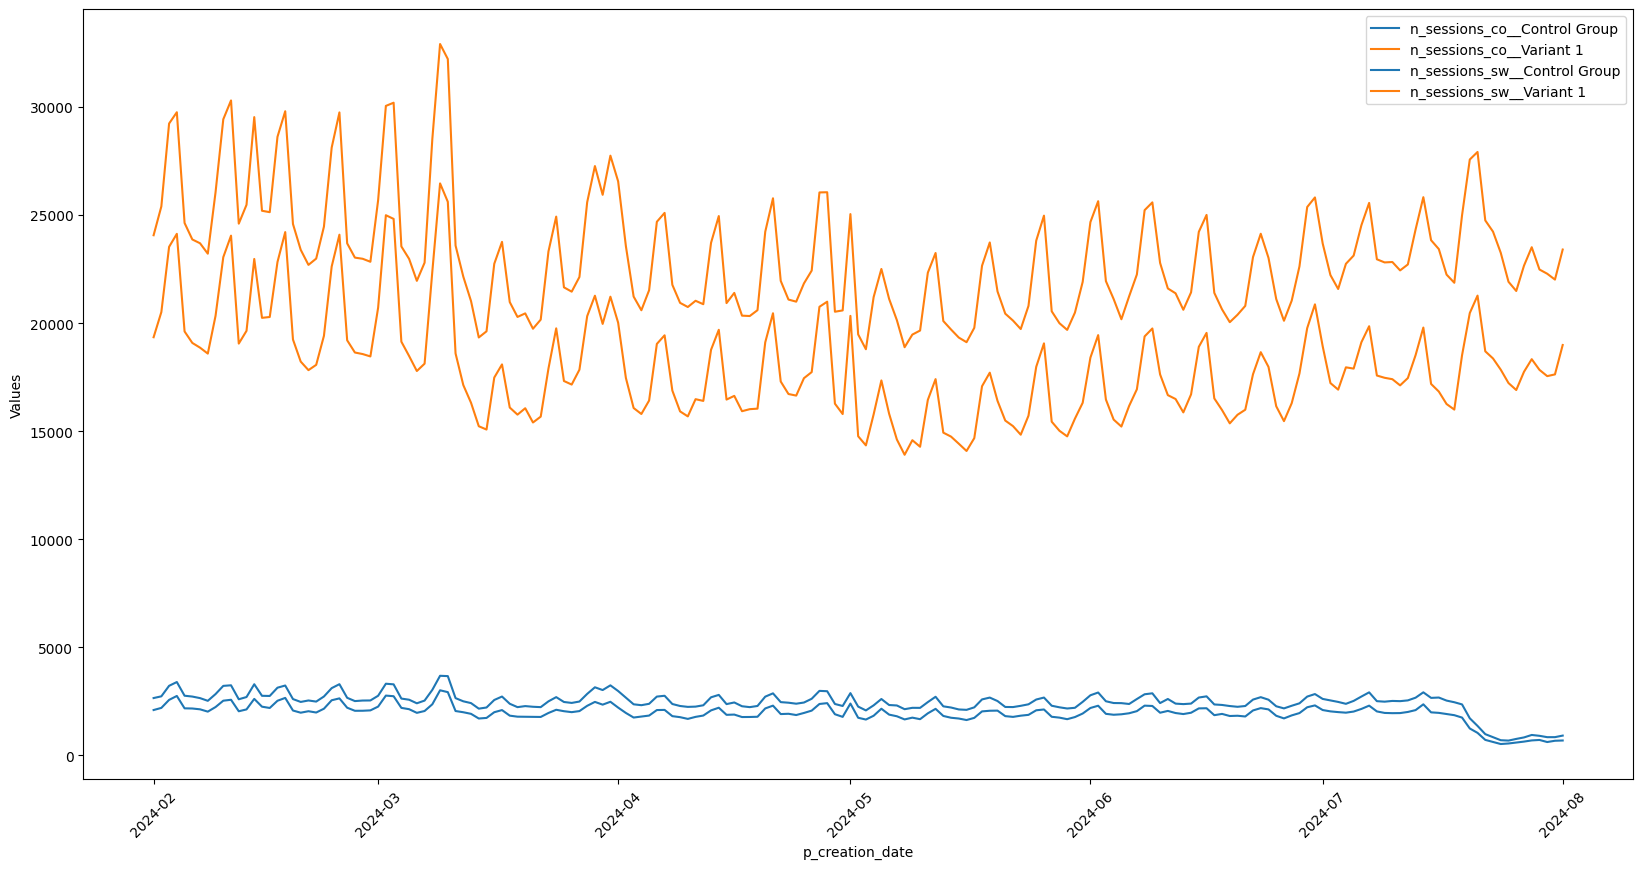

In [22]:
tmp = df.copy()

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Health'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['n_sessions_co__Control Group','n_sessions_co__Variant 1','n_sessions_sw__Control Group','n_sessions_sw__Variant 1']
    ,colors=['blue','orange','blue','orange']
)

# Comparison Sponsored vs not Sponsored

In [77]:
df

,category,n_sessions,category,n_sessions
0,None,983030,None,NaN
1,Shops,2302555,None,NaN
2,Groceries,6813803,None,NaN
3,Health,870977,None,NaN
4,Food,34190721,Food,863308.0
